imported
loaded


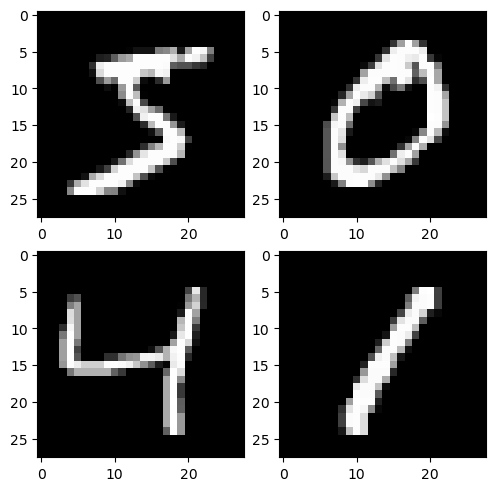

In [1]:
from glio.importsall import *
from glio.datasets import MNIST
print('imported')
dstrain, dstest = MNIST.get_mnist_classification()
print('loaded')
dstrain.preview()

In [2]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = ConvBlock(1, 16, 4, 1, act=nn.ReLU(), pool=nn.MaxPool2d(2,2))
        self.c2 = ConvBlock(16, 32, 3, 1, act=nn.ReLU(), pool=nn.MaxPool2d(2, 2))
        self.c3 = ConvBlock(32, 64, 2, 1, act=nn.ReLU(), pool=nn.MaxPool2d(2, 2))
        self.linear = LinearBlock(64*3*3, 10, act=nn.Softmax(dim=1), flatten=True)
    
    def forward(self,x):
        x = self.c1(x)
        x = self.c2(x)
        x = self.c3(x)
        x = self.linear(x)
        return x


print(f'{count_parameters(CNN()) = }')
gsummary(CNN(), (1, 1, 28,28))

count_parameters(CNN()) = 18938
path                                         module                                       input size               output size              params    buffers   
__main__.CNN/c1/0                            torch.nn.modules.conv.Conv2d                 (1, 1, 28, 28)           (1, 16, 29, 29)          272       0         
__main__.CNN/c1/1                            torchzero.nn.layers.crop.SpatialReduceCrop   (1, 16, 29, 29)          (1, 16, 28, 28)          0         0         
__main__.CNN/c1/2                            torch.nn.modules.pooling.MaxPool2d           (1, 16, 28, 28)          (1, 16, 14, 14)          0         0         
__main__.CNN/c1/3                            torch.nn.modules.activation.ReLU             (1, 16, 14, 14)          (1, 16, 14, 14)          0         0         
__main__.CNN/c2/0                            torch.nn.modules.conv.Conv2d                 (1, 16, 14, 14)          (1, 32, 14, 14)          4640      0         
__

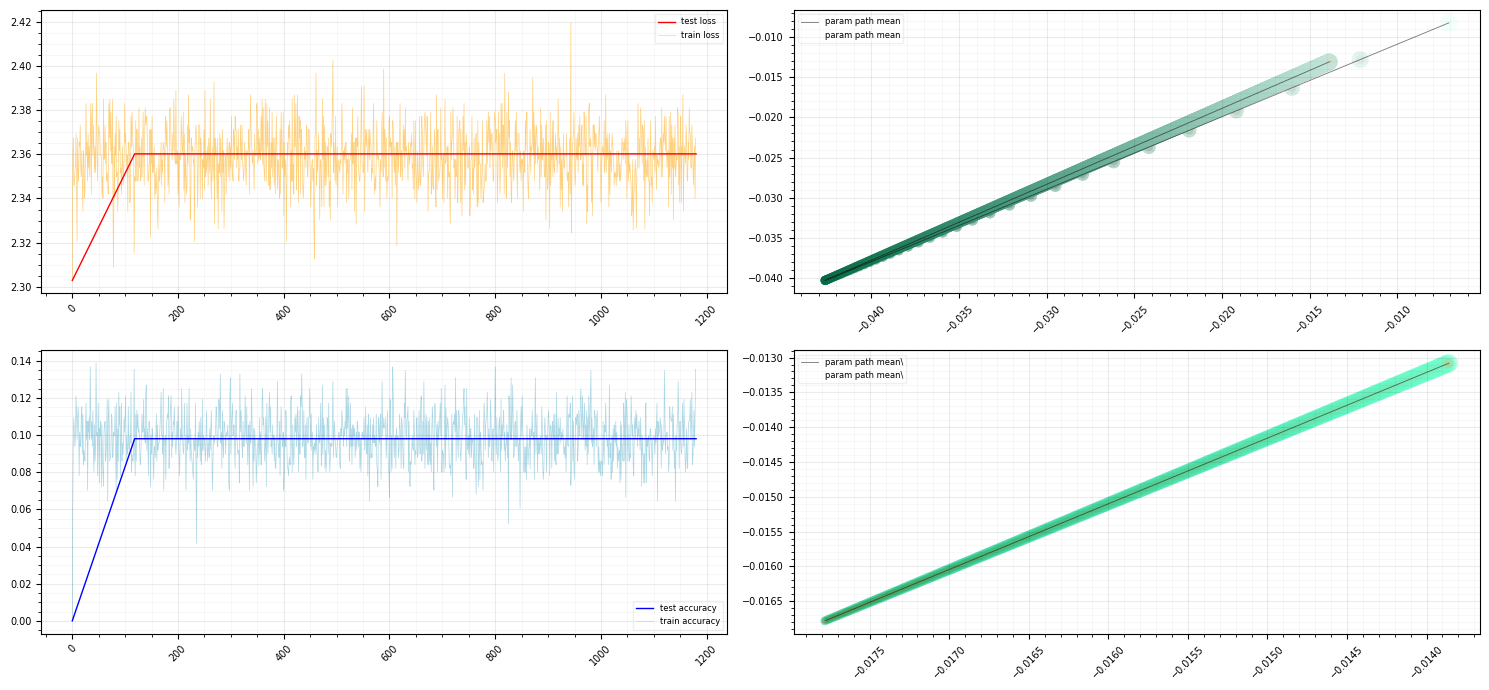

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉     | 10/10 | 8.01s/ops, elapsed: 01m:12s, rem: 8.01s | 

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉  | 20/20 | 71.97ops/s, elapsed: 264ms, rem: 14ms | 
train loss:                              last = 2.367, min = 2.303, max = 2.419
test loss:                               last = 2.360, min = 2.303, max = 2.360
train accuracy:                          last = 0.135, min = 0.000, max = 0.139
test accuracy:                           last = 0.098, min = 0.000, max = 0.098

| metric | n | min | max | first | last |
| :- | :- | :- | :- | :- | :- |
| grad std | 1180 | 0.0000 | 0.0002 | 0.0002 | 0.0000 |
| grad-update angle | 1180 | 0.0000 | 1.8315 | 1.5305 | 0.0000 |
| grad-update mean | 1180 | 0.0000 | 0.0963 | 0.0963 | 0.0002 |
| last grads mean | 1179 | 0.0000 | 0.0001 | 0.0001 | 0.0000 |
| last updates std | 1179 | 0.0000 | 0.0060 | 0.0060 | 0.0000 |
| param max | 1180 | 0.2590 | 0.7999 | 0.3396 | 0.2590 |
| param mean | 1180 | -0.0301 | -0.0052 | -0.0052 | -0.0098 |
| param min | 1180 | -0.8096 | -0.2621 | -0.3475 | -0.2621 |
| param var | 1180 | 0.0116 | 0.3145 | 0.0116 | 0.0332 |
| train accuracy | 1180 | 0.0000 | 0.1387 | 0.0000 | 0.1354 |
| test accuracy | 11 | 0.0000 | 0.0980 | 0.0000 | 0.0980 |
| test accuracy max | 11 | 0.0000 | 0.1113 | 0.0000 | 0.1113 |
| test accuracy median | 11 | 0.0000 | 0.0994 | 0.0000 | 0.0994 |
| test accuracy min | 11 | 0.0000 | 0.0820 | 0.0000 | 0.0820 |
| train loss | 1180 | 2.3032 | 2.4195 | 2.3032 | 2.3674 |
| test loss | 11 | 2.3029 | 2.3602 | 2.3029 | 2.3602 |
| test loss max | 11 | 2.3032 | 2.3791 | 2.3032 | 2.3791 |
| test loss median | 11 | 2.3029 | 2.3596 | 2.3029 | 2.3596 |
| test loss min | 11 | 2.3026 | 2.3440 | 2.3026 | 2.3440 |
| time | 1180 | 1.9510 | 79.0014 | 1.9510 | 79.0014 |
| update angle | 1180 | 0.0000 | 1.1383 | 1.1383 | 0.0000 |
| update var | 1180 | 0.0000 | 0.0003 | 0.0003 | 0.0000 |


In [3]:
with seeded_rng(): MODEL = CNN()
LR = 1e-1
MAGN = None
BATCH_SIZE = 512
N_EPOCHS = 10
LOSS_FN = nn.CrossEntropyLoss()
METRIC_STEP = 1

with seeded_rng():
    DLTRAIN = DataLoader(dstrain, BATCH_SIZE, shuffle=True, **seed0_kwargs)
    DLTEST = DataLoader(dstest, BATCH_SIZE, shuffle=False, **seed0_kwargs)

OPT = torch.optim.AdamW(MODEL.parameters(), lr = LR)
#SCHED = lr_scheduler.CosineAnnealingLR(OPT, N_EPOCHS)
SCHED = None

CALLBACKS = (LogLossCB(),

            SaveForwardChannelImagesCB(dstest[0][0].unsqueeze(0)),
            MetricAccuracyCB(),
            LogParamDistCB(METRIC_STEP),
            LogParamPathCB(METRIC_STEP),
            LogUpdateDistCB(METRIC_STEP),
            LogUpdatePathCB(METRIC_STEP),
            LogLastUpdatesAngleCB(METRIC_STEP),
            LogGradDistCB(METRIC_STEP),
            LogGradUpdateAngleCB(METRIC_STEP),
            LogGradPathCB(METRIC_STEP),
            LogLastGradsAngleCB(METRIC_STEP),
            LogTimeCB(),
            #LogLRCB(),
            #LogOptimizerParamCB('magn'),
            DisplayLoggerTableCB(),
            AccelerateCB("no"),
            PerformanceTweaksCB(True),
            SaveLastCB(),
            LivePlotCB(1000, plot_keys = ("4plotsplot","10metrics01"),path_keys=("4plotspath250",)),
            SimpleProgressBarCB(),
            OneBatchClosureCB(),
            #GradientFreeWithZeroGradCB(),
            #OneBatchClosureWithNoBackwardCB(),
)
clean_mem()

# MODEL = gnn.LSUV(MODEL, DLTRAIN, max_iter=5)

LEARNER_NAME = f"AdamW lr{LR:.0e}"
learner = Learner(MODEL, LEARNER_NAME, CALLBACKS, loss_fn=LOSS_FN, optimizer=OPT, scheduler=SCHED, )
learner.fit(N_EPOCHS, DLTRAIN, DLTEST,test_on_interrupt=False)